# <center><font color='crimson'><b>Sales Prediction in Retail</center>

## <center><font color='green'><b>Domain : Retail</center>

## Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?
    - Feature Description
    - Source
    - Evaluation Metric
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Training & Testing Data
    - Shape of data
    - Dtypes

#### 3. **Exploratory Data Analysis, Data Cleaning & Pre-processing**
    - Merging Train + Test Data for Pre-processing
    - Shape
    - Missing Values
    - Descriptive Stats
    - EDA (Phase 1)
    - Null Values Imputation
    - Label Encoding
    - Mean Encoding
    - EDA (Phase 2)
    - Null values Imputation by FancyImpute
    - Logarithmic Transformations
    - EDA (Phase 3)
    - Pearson Correlation

#### 4. **Normalization**

#### 5. **Modelling**
    - Splitting Data & Choosing Algorithms
    - Linear Regression Implementation
    - XGB (Xtreme Gradient Boosting) Implementation
    - Examining Evaluation Metrics (RMSLE)
    - Exponential Prediction

#### 6. **What's next ?**

### Reason for Choosing this Dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.

### Feature Description :

**Item Identifier**: A code provided for the item of sale <br>

**Item Weight**: Weight of item <br>

**Item Fat Content**: A categorical column of how much fat is present in the item : ‘Low Fat’, ‘Regular’, ‘low fat’, ‘LF’, ‘reg’ <br>

**Item Visibility**: Numeric value for how visible the item is  <br> 

**Item Type**: What category does the item belong to: ‘Dairy’, ‘Soft Drinks’, ‘Meat’, ‘Fruits and Vegetables’, ‘Household’, ‘Baking Goods’, ‘Snack Foods’, ‘Frozen Foods’, ‘Breakfast’, ’Health and Hygiene’, ‘Hard Drinks’, ‘Canned’, ‘Breads’, ‘Starchy Foods’, ‘Others’, ‘Seafood’. <br>

**Item MRP**: The MRP price of item <br>

**Outlet Identifier**: Which outlet was the item sold. This will be categorical column <br>

**Outlet Establishment Year**: Which year was the outlet established <br>

**Outlet Size**: A categorical column to explain size of outlet: ‘Medium’, ‘High’, ‘Small’.  <br> 

**Outlet Location Type**: A categorical column to describe the location of the outlet: ‘Tier 1’, ‘Tier 2’, ‘Tier 3’  <br>

**Outlet Type** : Categorical column for type of outlet: ‘Supermarket Type1’, ‘Supermarket Type2’, ‘Supermarket Type3’, ‘Grocery Store’  <br>

**Item Outlet Sales**: The amount of sales for an item.  <br>

### Source :
- Confidential Source

### Evaluation Metrics :

- **RMSLE (Root Mean Squared Logarithmic Error)**

### Objective :
- Goal of this project is to **predict the sales** of a Retail outlet based on the historical data provided for sales.

### Loading Dataset

- Firstly we'll load required modules and data to our notebook.


- Later, we'll do data cleansing/pre-processing

In [0]:
#required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading train data

train = pd.read_csv('Train_Retail.csv', header=0)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#reading test set

test = pd.read_csv('Test_Retail.csv', header=0)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#training & test Shape

train.shape, test.shape

((8523, 12), (5681, 11))

- The Shape of Training set is 
    - **Examples : 8532**
    - **Features : 12 (including Target)**
    
- The Shape of Test set is
    - **Examples : 5681**
    - **Features : 11 (Target to Predict)**

In [5]:
#attribute info of train & test

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content  

(None, None)

- Above result shows us the datatypes of our features


- We got
    - **(4) x float64**
    - **(1) x int64**
    - **(7) x object**

### EDA , Data Cleansing & Pre-processing

In [6]:
#splitting target variable from training set
#and merging train + test datasets for preprocessing

target = train['Item_Outlet_Sales']
train = train.drop(['Item_Outlet_Sales'], axis=1)

df = pd.concat([train, test])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


- We're **splitting Target feature** from our **Train set.**


- And We're **combining Train + Test Set** for **faster preprocessing / data cleansing.**


- This approach is widely followed nowdays.

In [7]:
#Overall shape of merged dataset

df.shape

(14204, 11)

- Now, overall shape of our dataset is
    - **Examples : 14204**
    - **Features : 11**

In [8]:
#Checking Null Values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- We can observe that we have missing values in our dataset.


- **Item_Weight** has **2439 Missing values** which comprises of **~17% of Missing Values** in that feature.


- While, **Outlet_Size** has **4016 Missing values** which comprises of **~28% of Missing Values** in that particular feature.

In [9]:
#Descriptive Statistics

#sns.set_context('talk')
#plt.figure(figsize=(15,10))
#sns.heatmap(df.describe(), annot=True)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


**Descriptive Statistics for Whole Dataset**

- **Item_Weight** has values ranging from **4.55 to 21.35 with a mean value of 12.60** (adjusted to 2 decimal points). Count is showing as **11765** although we have **14204** number of rows in our dataset. This phenomenon is justified by missing value count of **2439**.


- **Item_MRP** has values ranging from **31.29 to 266.88 with a mean value of 142.24**.


- **Outlet_Establishment_Year** has values ranging from **1985 to 2009**. From this we can see that, first store established in 1985 and the most recent store begun in 2009.

In [10]:
#Unique code provided for item of sale

df['Item_Identifier'].nunique()

1559

- We got 1559 unique Item Code/Identifier.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

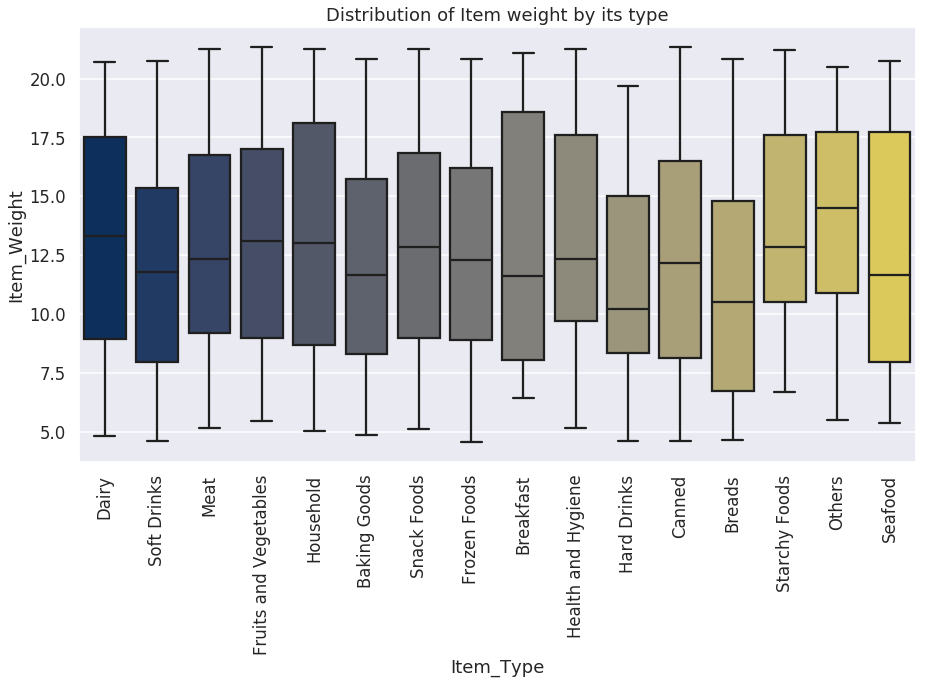

In [11]:
#Lets see how item weight is distributed among item type

plt.figure(figsize=(15,8))
sns.set_context('talk')
sns.set_style('darkgrid')
sns.boxplot(df['Item_Type'], df['Item_Weight'], palette='cividis')
plt.title('Distribution of Item weight by its type')
plt.xticks(rotation=90)

- We got **16 different Item Types** in our dataset which includes **Dairy, Soft Drinks, Meat, Snacks, Frozen food, etc**


- We can observe that **different types of Items hold different weight.**


- We can further **fill Null values in Item_Weight considering the Mean Weight of these Item types.**  

In [12]:
#Let's check Item Fat content

df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

- Exploring the above results we can observe that we've **"Low Fat", "low fat" & "LF"** which is obviously nothing but the same.


- Similarly, **"Regular" & "reg"** is not different.


- We can **replace** them so we would get just 2 types of Fat Content , i.e, **"Regular" & "Low Fat".**

Text(0.5, 1.0, 'Fat content Impact on Sales')

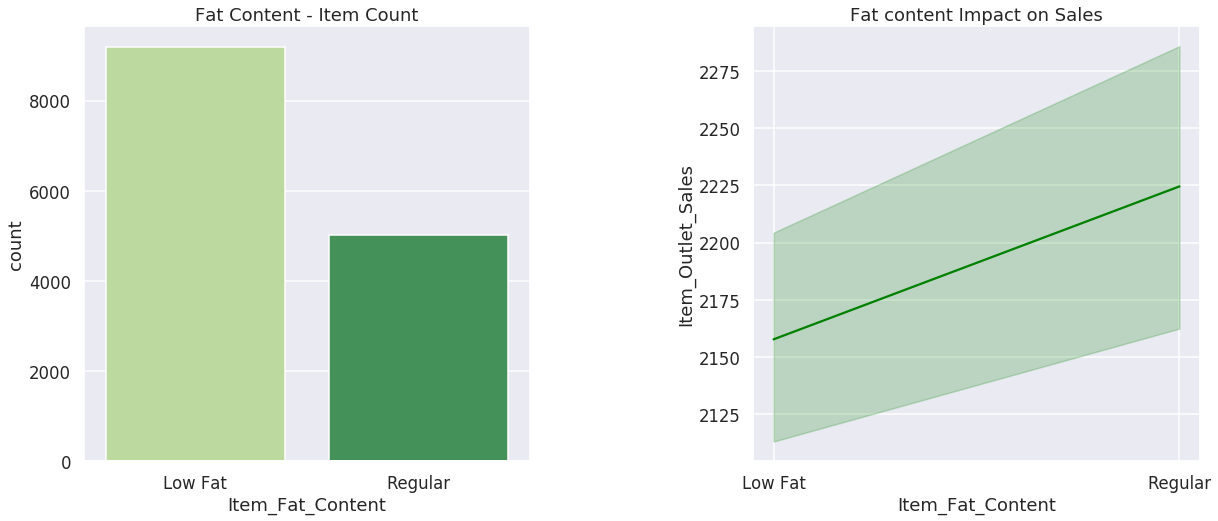

In [13]:
#replacing Fat type values to known values
#Plot Fat type count and plot how Fat content affects sales

plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(1,2,1)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
sns.countplot(df['Item_Fat_Content'], palette='YlGn')
plt.title('Fat Content - Item Count')

plt.subplot(1,2,2)
sns.lineplot(df['Item_Fat_Content'][:train.shape[0]], target, color='g')
plt.title('Fat content Impact on Sales')

- From plot (1) or L.H.S plot , we can observe that we've ample units of Low Fat content Items than that of Regular Fat content.


- Plot (2) or R.H.S plot, gives us a brief idea of how Sales are being affected by just Fat content. **Low Fat content Items are sold quite less than Regular Fat content Items despite of having ample units of Low Fat content Items in Store.**


- Let us also encode this ahead.

In [0]:
#encoding Fat content

df['Item_Fat_Content'].replace(('Low Fat', 'Regular'), (0, 1), inplace=True)

In [0]:
#Avg. weight of Item by Item type

avg_weight = df.groupby(['Item_Type'])['Item_Weight'].mean()
avg_weight = avg_weight.to_frame().reset_index()

- Avg. weight is nothing but **Mean weight of Item** by **Item Type** so we can further **fill NaN values in Item_Weight.**

In [16]:
'''for i in np.arange(len(avg_weight)):
    x, y = avg_weight.iloc[i]
    print (x, y)'''

'for i in np.arange(len(avg_weight)):\n    x, y = avg_weight.iloc[i]\n    print (x, y)'

In [0]:
#Let's reset index of dataframe before proceeding into null value filling process.

df.reset_index(inplace=True)
df = df[df.columns[1:]]
df['new_item_weight'] = np.nan

In [0]:
#we'll fill null values in Item_weight with respect to Item Type

def item_weight(avg_weight_by_type):
    for i in np.arange(len(avg_weight_by_type)):
        x, y = avg_weight.iloc[i]
        sliced_df = df[df['Item_Type'] == str(x)]
        sliced_replaced_values = df['Item_Weight'][sliced_df.index].replace(np.nan, y)
        df['new_item_weight'][sliced_replaced_values.index] = sliced_replaced_values.values
        

- We had created **User-Defined function** to fill NaN's in sliced dataframe by its Item_type.


- We are creating new_item_weight feature which will have all the values of Item_Weight but NaN's will be filled.


- We can further drop Item_Weight.


- Let's intialize our defined function ahead.

In [19]:
#Applying user defined function

print (item_weight(avg_weight))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


None


In [20]:
#Lets see some samples of data to see if our new column has similar values of Item_weight with replaced NaN

df[['Item_Weight', 'new_item_weight']].sample(10)

,Item_Weight,new_item_weight
9167,5.190,5.190000
9368,7.905,7.905000
10984,6.440,6.440000
2397,20.700,20.700000
11201,NaN,13.238358
10782,5.210,5.210000
4194,14.000,14.000000
5994,9.695,9.695000
1803,13.100,13.100000
8540,17.850,17.850000


- Above is sample of **Item_Weight** & **new_item_weight** at same index, we can observe that the row information at index 12013 has NaN in Item_Weight but new_item_weight has the NaN fixed.


- Which concludes that we've filled **Null Values** with mean weight of that **Item_Type.**


- Let us also drop our **Item_Weight** as we have **new_item_weight**

In [0]:
#dropping item weight

df.drop(['Item_Weight'], axis=1, inplace=True)

Text(0.5, 1.0, 'Item Sales \nby its Visibility')

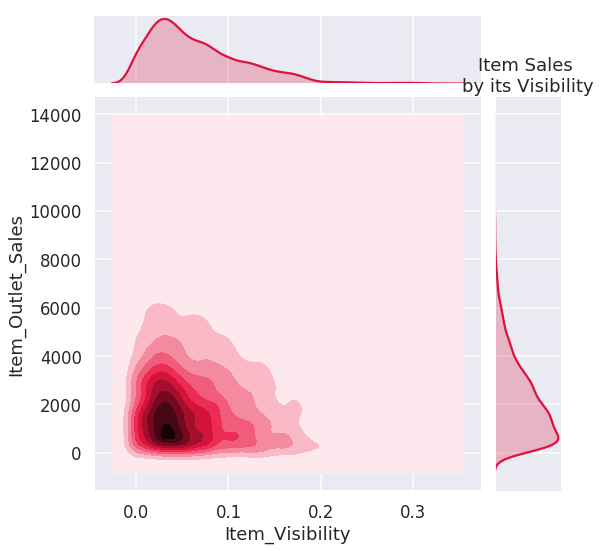

In [22]:
#Numeric value for how visible the item is

sns.set_context('talk')
sns.jointplot(df['Item_Visibility'][:train.shape[0]], target, kind='kde', color='crimson', height=8, )
plt.title('Item Sales \nby its Visibility')

- Above is the beautiful vizualization which depits **Item Sales by Item Visibility**. In short, how item is being sold by how much visible it is in the store racks.


- **0.0 meaning it's in front, meaning more visible while 0.1 is less visible** and so on.


- And we can observe that **more visible Items are sold more, less visible are sold less.**

In [0]:
#Lets mean encode Item visibility for Vizualization

def mean_encode(data):
    if data <= 0.1:
        return 1
    if data <= 0.2 and data > 0.1:
        return 2
    if data <= 0.3 and data > 0.2:
        return 3
    if data <= 0.4 and data > 0.3:
        return 4
    
df['Item_Visibility_mean_enc'] = df['Item_Visibility'].apply(lambda x : mean_encode(x))

**Alternate Way**

- As we have Item_visibility in continuous form we can mean encode it by user_defined function , i.e, less than equals 0.1 can be considered as 1, less than equals 0.2 but greater than 0.1 can be encoded as 2 and so on. 


- This approach will give us categorical values , i.e, 1,2,3,4 in our case stating 1 as more visible Items, 2 is less visible , etc.


- And we can observe it in below plot how the vizibility impacts sales.

Text(0.5, 1.0, 'Imapact of Item Visibility on Sales')

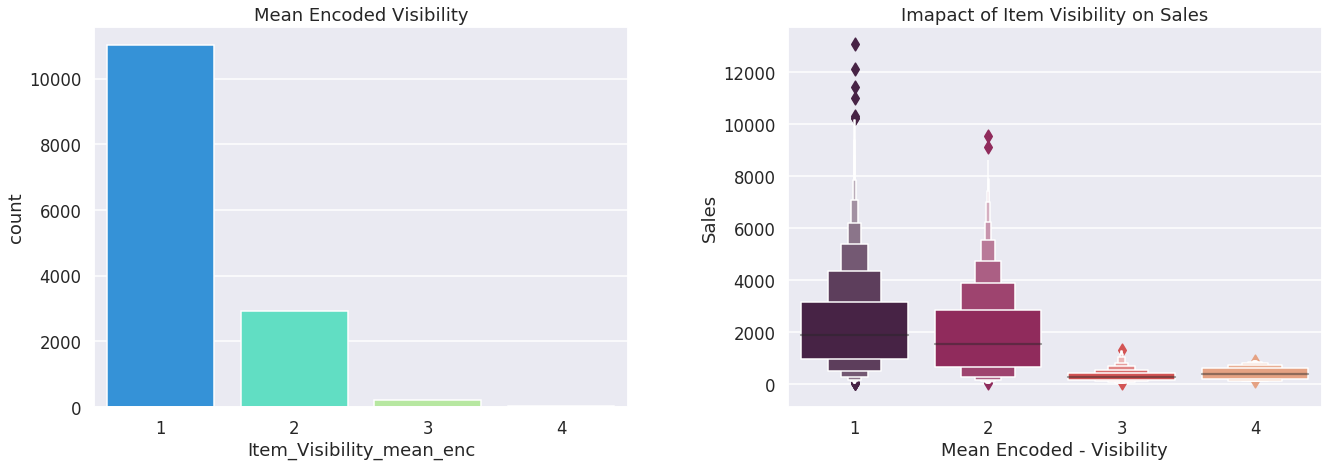

In [24]:
plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.countplot(df['Item_Visibility_mean_enc'], palette='rainbow')
plt.title('Mean Encoded Visibility')

plt.subplot(1,2,2)
sns.boxenplot(df['Item_Visibility_mean_enc'][:train.shape[0]], target, palette='rocket')
plt.ylabel('Sales')
plt.xlabel('Mean Encoded - Visibility')
plt.title('Imapact of Item Visibility on Sales')

- Above R.H.S plot is the alternate plot depicting us the same like we saw earlier that visible items were sold more and less visible didn't do much.


- Item falling in 1 & 2 category of visibility were sold more.

Text(0.5, 1.0, 'Item MRP Distribution by Item Type')

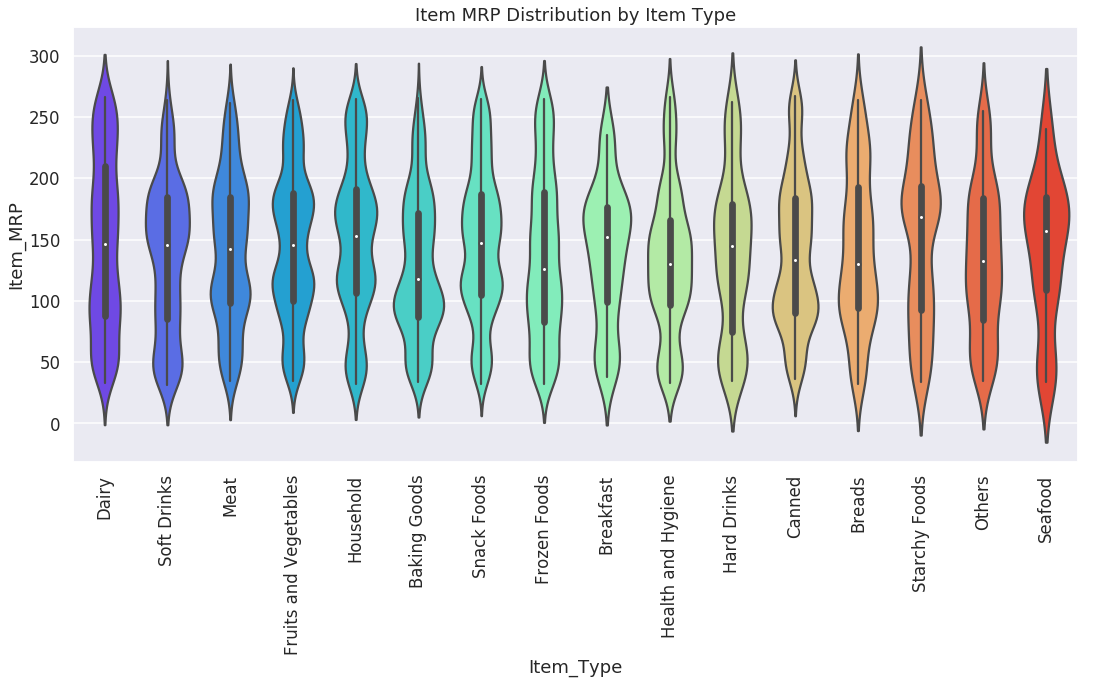

In [25]:
#Let's look at MRP as per Item type

plt.figure(figsize=(18,8))
sns.violinplot(df['Item_Type'], df['Item_MRP'], palette='rainbow', dodge=True, alpha=0.5, zorder=1)
plt.xticks(rotation=90)
plt.title('Item MRP Distribution by Item Type')

- Above Item shows us how Maximum Retail Price of Item by each Item type.


- Ofcourse , we have different values for different types.


- But this vizualization shows us the distribution of MRP by Item type. 


- One interesting thing we can observe is that Median price for all Item Types is lying between 100 MRP to 200 MRP.

In [0]:
#Let's encode Item Type

items = df['Item_Type'].value_counts().index

encoding_values = range(len(items))

df['Item_Type'].replace(items, encoding_values, inplace=True)

- We have encoded Item_Type above.

Text(0.5, 1.0, 'Impact of outlets on Sales')

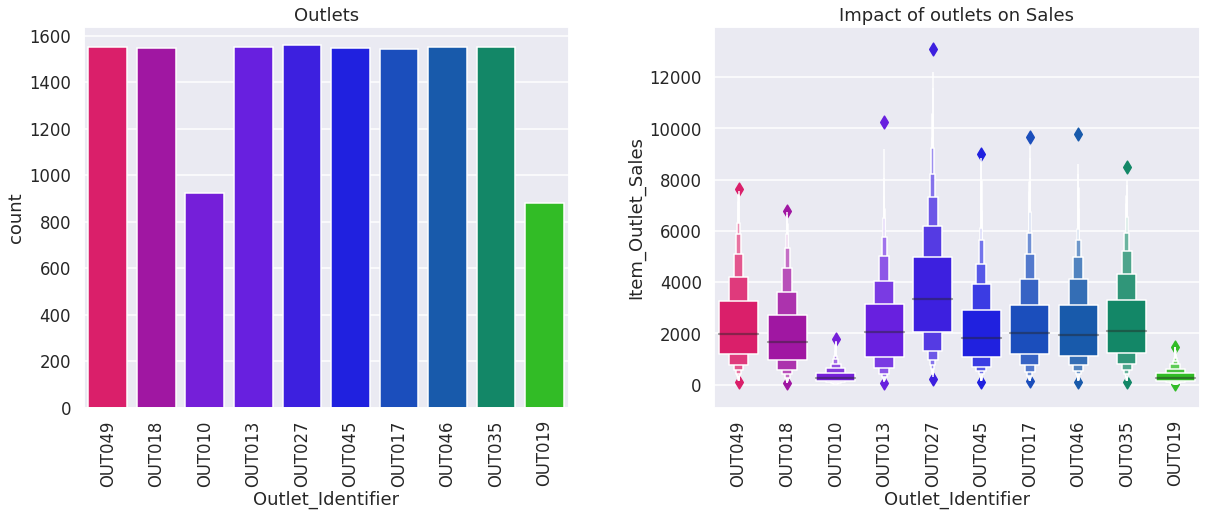

In [27]:
#Outlet Identifier

plt.figure(figsize=(20,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.countplot(df['Outlet_Identifier'], palette='prism')
plt.xticks(rotation=90)
plt.title('Outlets')

plt.subplot(1,2,2)
sns.boxenplot(df['Outlet_Identifier'][:train.shape[0]], target, palette='prism')
plt.xticks(rotation=90)
plt.title('Impact of outlets on Sales')

- We can observe that **Out027** had made good amount of Sales compared to other outlets.


- While, **Outlet10 , Outlet19** did least amount of sales among others.

Text(0.5, 1.0, 'Impact on Sales due to Outlet Establishment')

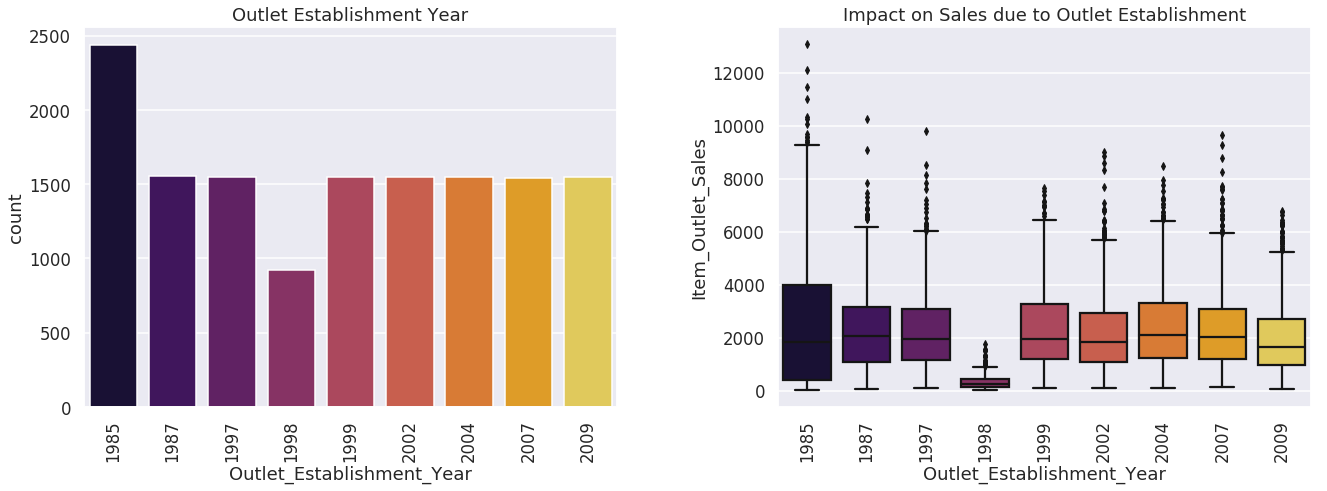

In [28]:
plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.countplot(df['Outlet_Establishment_Year'], palette='inferno')
plt.xticks(rotation=90)
plt.title('Outlet Establishment Year')

plt.subplot(1,2,2)
sns.boxplot(df['Outlet_Establishment_Year'][:train.shape[0]], target, palette='inferno')
plt.xticks(rotation=90)
plt.title('Impact on Sales due to Outlet Establishment')

- We could observe that when store first established in **1985** the sales were **booming** , maybe because of **curosity of people to try our store.** But we need to also consider **location / regional factor.** Like we see in the case of 1998's outlets.


- There is clear **dip** in Sales which is identified from Outlet opened in **1998.**


- **What can be the reason ?** Ofcourse, could be the **regional / location factor.**

- Let us also encode **Outlet_Identifier, Outlet_Size, Outlet_Location_Type** & **Outlet_Establishment_Year.**

In [0]:
#Let's encode Outlet Identifier

outlets = df['Outlet_Identifier'].value_counts().index

enc_outlets = range(len(outlets))

df['Outlet_Identifier'].replace(outlets, enc_outlets, inplace=True)

In [0]:
#Let's encode Outlet Establishment year

years = df['Outlet_Establishment_Year'].value_counts().index.sort_values()

enc_years = range(len(years))

df['Outlet_Establishment_Year'].replace(years, enc_years, inplace=True)

In [0]:
#Encoding Outlet Size
#High, Tier 3 = 3
#Medium, Tier 2 = 2
#Small, Tier 1 = 1

df['Outlet_Size'].replace(('High', 'Medium', 'Small'), (3,2,1), inplace=True)
df['Outlet_Location_Type'].replace(('Tier 3', 'Tier 2', 'Tier 1'), (3,2,1), inplace=True)

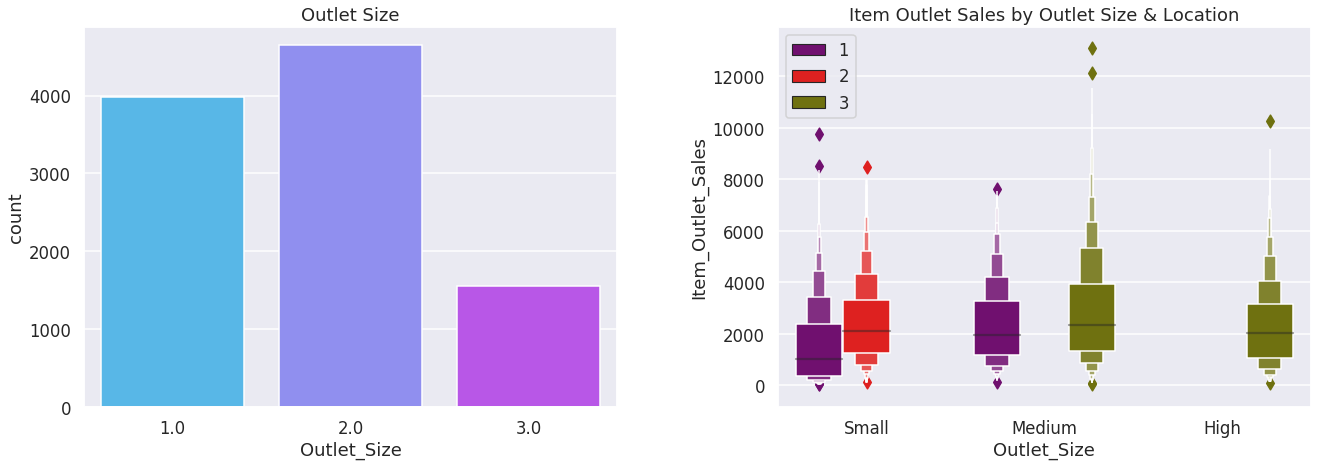

In [32]:
#Outlet Size

plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.countplot(df['Outlet_Size'], palette='cool')
plt.title('Outlet Size')

plt.subplot(1,2,2)
sns.boxenplot(df['Outlet_Size'][:train.shape[0]], target, hue=df['Outlet_Location_Type'][:train.shape[0]], palette='brg')
plt.xticks(ticks=(0, 1, 2), labels=('Small', 'Medium', 'High'))
plt.title('Item Outlet Sales by Outlet Size & Location')
label = ['Tier 1', 'Tier 2', 'Tier 3']
plt.legend(loc='upper left')

- From R.H.S. plot we can conclude that :

    - **Small Outlets** are present in **Tier 1** and **Tier 2** locations.
    - **Medium Outlets** are present in **Tier 1** and **Tier 3** locations.
    - **Big / High outlets** are present only in **Tier 3** Locations.
    - In **Tier 3** city the **High Outlet & Medium Outlet** are impacting more on **Sales.**

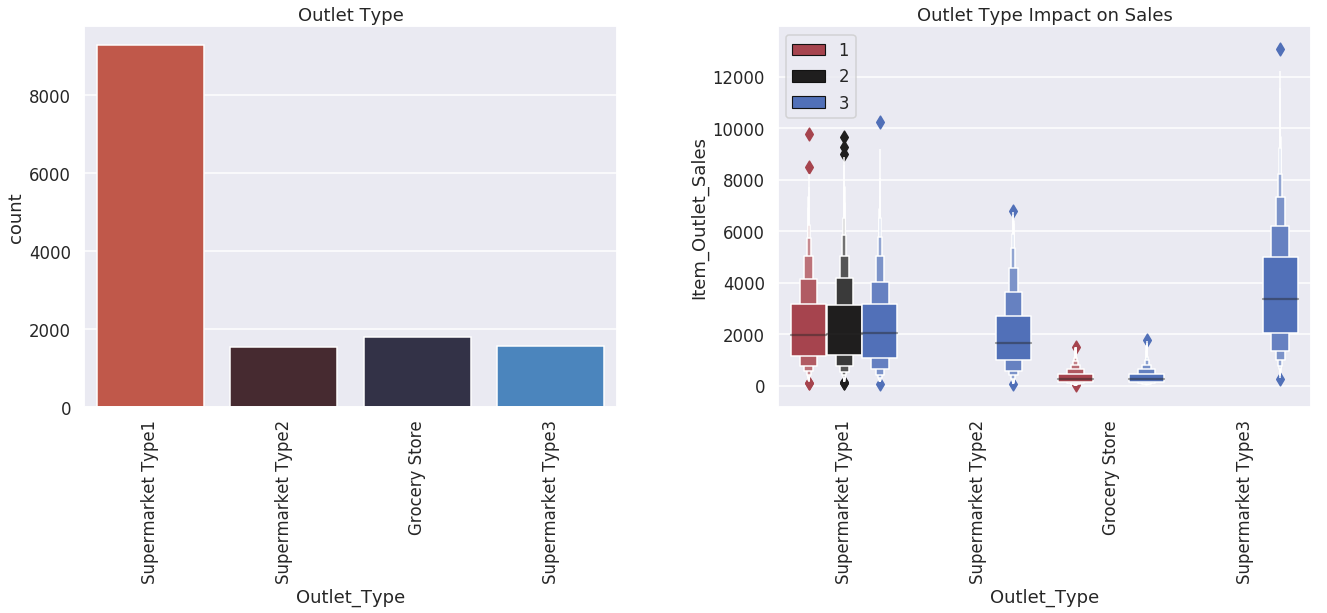

In [33]:
#Outlet type Analysis

plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.countplot(df['Outlet_Type'], palette='icefire_r')
plt.title('Outlet Type')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxenplot(df['Outlet_Type'][:train.shape[0]], target, hue=df['Outlet_Location_Type'][:train.shape[0]], palette='icefire_r')
plt.title('Outlet Type Impact on Sales')
plt.xticks(rotation=90)
plt.legend(loc='upper left')

- In R.H.S. Plot, we can observe that **Supermarket 1** is present in **All 3 Tiers Locations.**


- **Supermarket 2 and 3** is only found in **Tier 3 location.**


- While, **Grocery Store** is found in **Tier 1 and Tier 3 locations.**


- Let us also encode **Outlet_Type.** 

In [0]:
#Encoding Outlet Size

df['Outlet_Type'].replace(('Supermarket Type3', 'Supermarket Type2', 'Supermarket Type1', 'Grocery Store'), (3,2,1,0), inplace=True)

In [0]:
#Fetching Item Id's to known form 

df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])

- Let us fetch **Prefix of Item ID**, because we see that there are **identical** for every other **Item_Type** that we've in our dataset.

Text(0.5, 1.0, 'Item IDs')

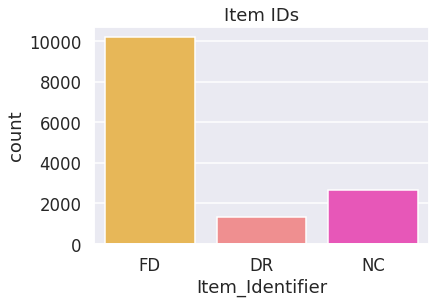

In [36]:
#item identifier count plot

sns.countplot(df['Item_Identifier'], palette='spring_r')
plt.title('Item IDs')

- **FD's** are **more dominant** in our dataset.


- Encoding **Item ID's** ahead.

In [0]:
#Label Encoding Item IDs

df['Item_Identifier'].replace(('FD', 'DR', 'NC'), (1,2,3), inplace=True)

In [38]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_item_weight,Item_Visibility_mean_enc
0,1,0,0.016047,4,249.8092,3,4,2.0,1,1,9.30,1
1,2,1,0.019278,9,48.2692,6,8,2.0,3,2,5.92,1
2,1,0,0.016760,8,141.6180,3,4,2.0,1,1,17.50,1
3,1,1,0.000000,0,182.0950,8,3,NaN,3,0,19.20,1
4,3,0,0.000000,2,53.8614,1,1,3.0,3,1,8.93,1


In [39]:
#Let's fill NaN values now using FancyInput's IterativeImputer

from fancyimpute import IterativeImputer

df_filled = pd.DataFrame(data=IterativeImputer(imputation_order='roman', n_iter=50, initial_strategy='mean').fit_transform(df.values), columns=df.columns, index=df.index)
df_filled.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_item_weight,Item_Visibility_mean_enc
0,1.0,0.0,0.016047,4.0,249.8092,3.0,4.0,2.00000,1.0,1.0,9.30,1.0
1,2.0,1.0,0.019278,9.0,48.2692,6.0,8.0,2.00000,3.0,2.0,5.92,1.0
2,1.0,0.0,0.016760,8.0,141.6180,3.0,4.0,2.00000,1.0,1.0,17.50,1.0
3,1.0,1.0,0.000000,0.0,182.0950,8.0,3.0,2.46485,3.0,0.0,19.20,1.0
4,3.0,0.0,0.000000,2.0,53.8614,1.0,1.0,3.00000,3.0,1.0,8.93,1.0


- Above we're using **Fancy Impute's "Iterative Imputer"** to fill NaN values of **Outlet_Size.**


- We'll Iterate it for **50 times** having initial strategy as **mean / average.**

In [40]:
#Checking null values

df_filled.isnull().any()

Item_Identifier              False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
new_item_weight              False
Item_Visibility_mean_enc     False
dtype: bool

- We can see that all Null values are replaced as we needed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

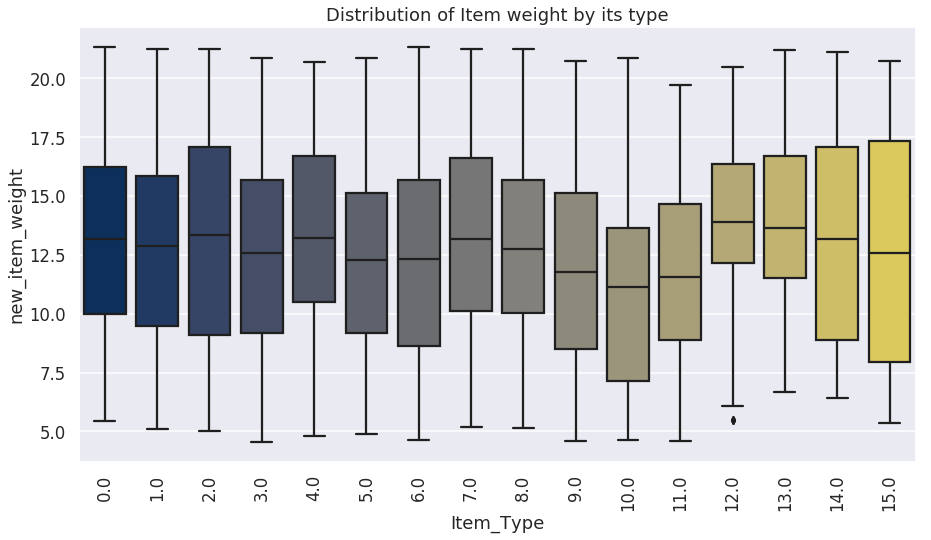

In [41]:
#Lets see again how item weight is distributed among item type

plt.figure(figsize=(15,8))
sns.set_context('talk')
sns.boxplot(df_filled['Item_Type'], df_filled['new_item_weight'], palette='cividis')
plt.title('Distribution of Item weight by its type')
plt.xticks(rotation=90)

- Let's us revist the same vizualization after filling Null values.


- We can see there is a slight change / movement in weights **median** values since we've replaced those NaN's with **Average Item_Weight** by **Item_Type.**

In [42]:
'''plt.figure(figsize=(20,15))
sns.heatmap(df_filled.corr()*100, square=True, annot=True, cmap='Wistia_r')
plt.title('Pearson Correlation')'''

"plt.figure(figsize=(20,15))\nsns.heatmap(df_filled.corr()*100, square=True, annot=True, cmap='Wistia_r')\nplt.title('Pearson Correlation')"

- By examining the above Correlation plot (x100 - For better understanding), we can say that there is no correlation between variables except **Mean_Item_Visibility** and **Item_visibility**
- We can drop one of the column.

In [0]:
#Let's drop Item_visibility, Item_MRP, new_item_weight and Item_visibility_mean_enc because we will take Log of those.

df_filled.drop(['Item_Visibility', 'Item_Visibility_mean_enc',
                'new_item_weight', 'Item_MRP'
                ], axis=1, inplace=True)

- Let's **drop** the above features as we going to **Log. transform** them to **reduce the effect of Outliers** on our statistical model.

Text(0.5, 1.0, 'Item Visibility Distribution')

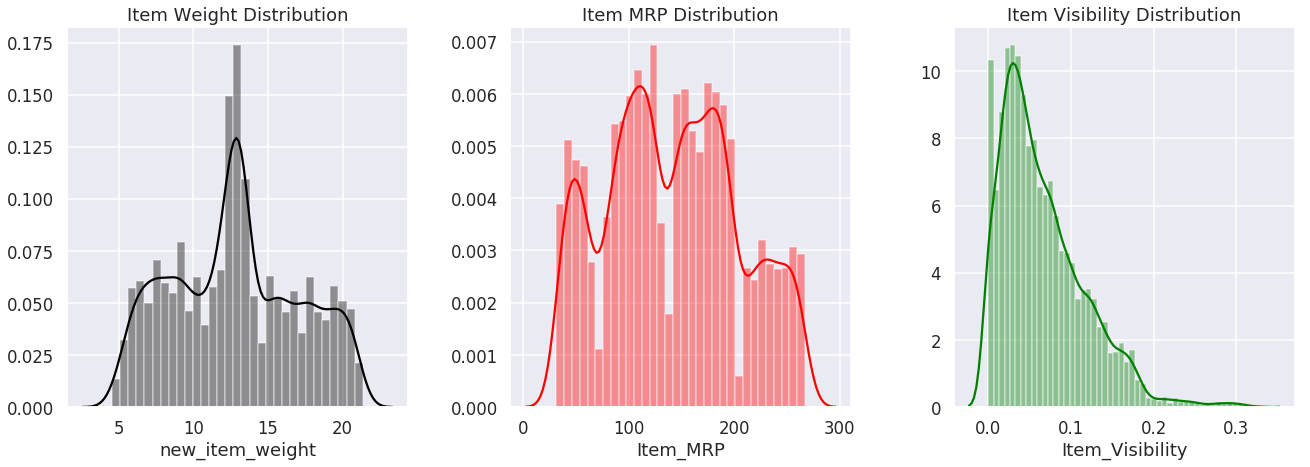

In [44]:
#Distribution of Item Weight, Item MRP & Item Visibility

plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,3,1)
sns.distplot(df['new_item_weight'], color='black')
plt.title('Item Weight Distribution')

plt.subplot(1,3,2)
sns.distplot(df['Item_MRP'], color='r')
plt.title('Item MRP Distribution')

plt.subplot(1,3,3)
sns.distplot(df['Item_Visibility'], color='g')
plt.title('Item Visibility Distribution')

- Above plot depicts the **distribution** of **new_item_weight, Item_MRP & Item_Visibility.**


- We're going to **Log Transform** all of these to reduce the effects of Outliers.

Text(0.5, 1.0, 'Log. Item Visibility Distribution')

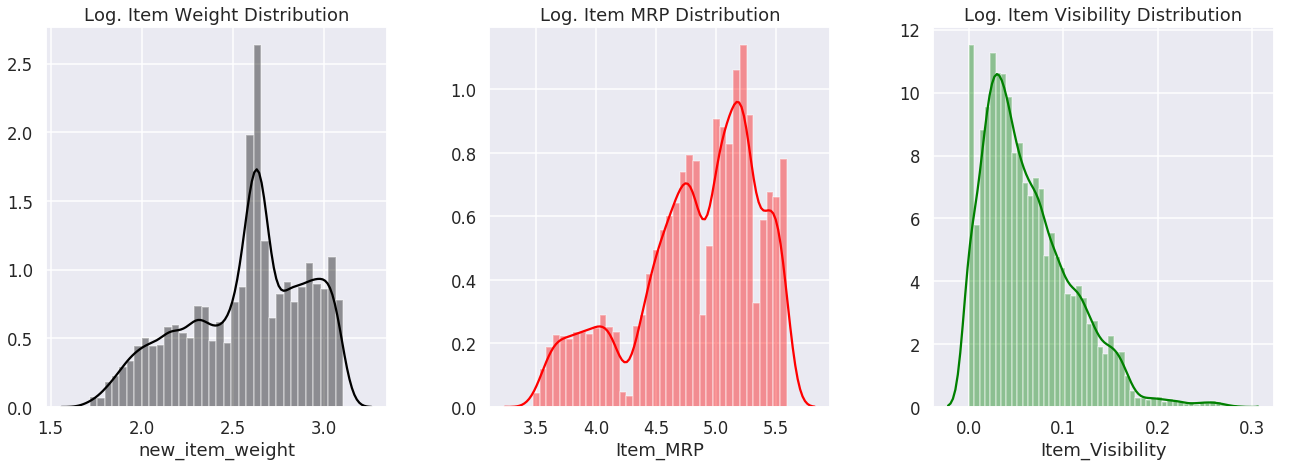

In [45]:
#Log Transformation

plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,3,1)
log_item_weight = np.log1p(df['new_item_weight'])
sns.distplot(log_item_weight, color='black')
plt.title('Log. Item Weight Distribution')

plt.subplot(1,3,2)
log_item_mrp = np.log1p(df['Item_MRP'])
sns.distplot(log_item_mrp, color='r')
plt.title('Log. Item MRP Distribution')

plt.subplot(1,3,3)
log_item_vis = np.log1p(df['Item_Visibility'])
sns.distplot(log_item_vis, color='g')
plt.title('Log. Item Visibility Distribution')

- Above plot is after **Log Transformation** of those 3 features.

In [46]:
df_filled['log_item_weight'] = log_item_weight
df_filled['log_item_mrp'] = log_item_mrp
df_filled['log_item_visibility'] = log_item_vis

df_filled.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,log_item_weight,log_item_mrp,log_item_visibility
0,1.0,0.0,4.0,3.0,4.0,2.00000,1.0,1.0,2.332144,5.524692,0.015920
1,2.0,1.0,9.0,6.0,8.0,2.00000,3.0,2.0,1.934416,3.897299,0.019095
2,1.0,0.0,8.0,3.0,4.0,2.00000,1.0,1.0,2.917771,4.960170,0.016621
3,1.0,1.0,0.0,8.0,3.0,2.46485,3.0,0.0,3.005683,5.210005,0.000000
4,3.0,0.0,2.0,1.0,1.0,3.00000,3.0,1.0,2.295560,4.004810,0.000000


- Let us assign those **Log. Transformed** values to our **df_filled dataframe.**

Text(0.5, 1.0, 'Pearson Correlation')

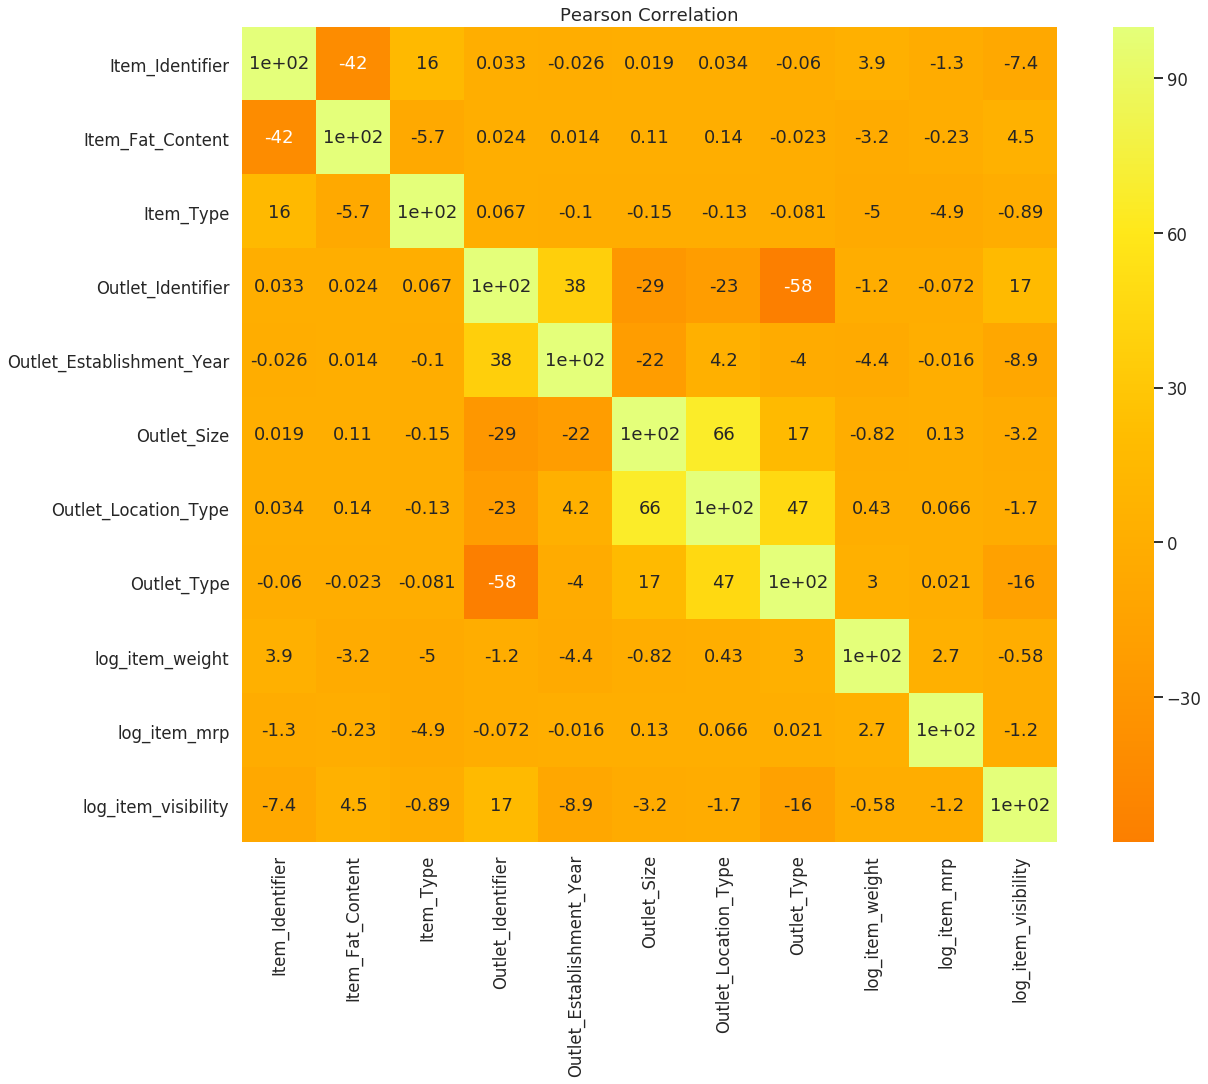

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(df_filled.corr()*100, square=True, annot=True, cmap='Wistia_r')
plt.title('Pearson Correlation')

- By examining the above **Correlation plot** (x100 - For better understanding), we can say that there is **no strong positive correlation between variables.**


- Let us **Normalize** the dataset using **Sklearn's Standard Scaler.**

In [48]:
#Let's scale our values

from sklearn.preprocessing import StandardScaler

cols = df_filled.columns

scaler = StandardScaler()

norm_df = scaler.fit_transform(df_filled.values)
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_filled.index)
norm_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,log_item_weight,log_item_mrp,log_item_visibility
0,-0.594556,-0.739212,-0.119994,-0.415315,0.076820,0.386949,-1.369286,-0.252702,-0.728843,1.325432,-0.994703
1,0.667976,1.352792,1.213441,0.688841,1.541944,0.386949,1.091566,1.002766,-1.934146,-1.818621,-0.927257
2,-0.594556,-0.739212,0.946754,-0.415315,0.076820,0.386949,-1.369286,-0.252702,1.045882,0.234798,-0.979805
3,-0.594556,1.352792,-1.186742,1.424945,-0.289461,1.133698,1.091566,-1.508171,1.312296,0.717470,-1.332905
4,1.930507,-0.739212,-0.653368,-1.151419,-1.022023,1.993379,1.091566,-0.252702,-0.839708,-1.610915,-1.332905


- Further let us **split** out dataset and bring it to Train / Test shape.


- Also, Let us observe the distribution of target variable and **Log. Transform** it.

In [49]:
#Let's split train and test data

train = norm_df[:train.shape[0]]
test = norm_df[train.shape[0]:]

print ('Shape of Training Set : ',train.shape)
print ('Shape of Testing Set : ',test.shape)

Shape of Training Set :  (8523, 11)
Shape of Testing Set :  (5681, 11)


Text(0.5, 1.0, 'Log. Item Outlet Sales')

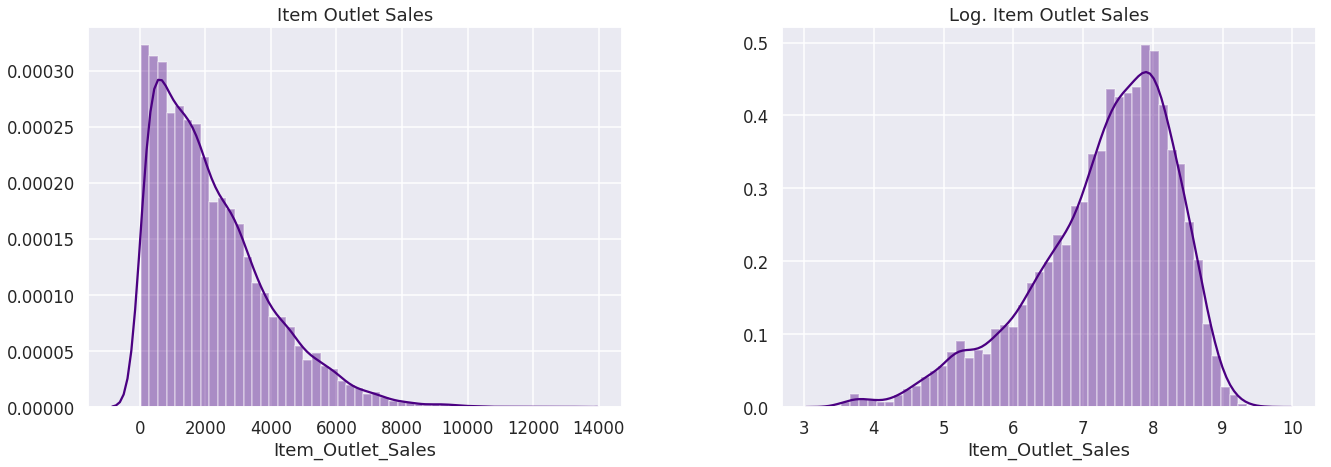

In [50]:
#Lets look at Target variable 

plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
sns.distplot(target, color='indigo')
plt.title('Item Outlet Sales')

plt.subplot(1,2,2)
log_target = np.log1p(target)
sns.distplot(log_target, color='indigo')
plt.title('Log. Item Outlet Sales')

In [51]:
#Lets form training and validation data

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

x = train
y = log_target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 11), (1705, 11), (6818,), (1705,))

### Null RMSLE

- Null RMSLE is the RMSLE that could be achieved by predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [52]:
#Null RMSLE

y_null = np.zeros_like(y_test)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.13317533497853673


### Building a Statistical Model

- In this step we are going to create data models that are capable of predicting the Outlet_Sales. Inorder to create these models first had already split the given Train dataset into Train and Validation datasets. Train dataset is the one which have the Logarithm of Item_Outlet_Sales values. We will train the model based on these values to validate the Validation dataset values.



- First we are going to create a basic **Linear Regression** model.

### Linear Regression

In [53]:
#Linear Regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(x_train, y_train)
lr_pred = est_lr.predict(x_test)
lr_pred

array([8.38519241, 7.12958456, 7.66959647, ..., 6.55160249, 8.18901682,
       7.86241487])

In [54]:
#Interpret intercept & Coef

est_lr.intercept_, est_lr.coef_

(7.302744380121686,
 array([ 0.00248612,  0.01051015,  0.00726774, -0.4551696 ,  0.30983541,
         0.06088068, -0.24749329,  0.3348808 , -0.00141686,  0.53364919,
        -0.03282611]))

**Intuition from Co-efficients :**

- We've these features :

**Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier,**<br>
**Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type,**<br>
**log_item_weight, log_item_mrp, log_item_visibility**


- And we got these Co-efficients :

**0.00248612,  0.01051015,  0.00726774, -0.4551696 ,**<br>
**0.30983541, 0.06088068, -0.24749329,  0.3348808 ,**<br>
**-0.00141686,  0.53364919, -0.03282611**

- We can say that each item sale largely depends on **MRP, Outlet Establishment year** & **Outlet Type.** 


- It is Surprising, **Outlet_Establishment_Year** is also one prominent feature affecting sales.



- <b>Note : We should clearly keep in mind that all these variables are inter-connected. We can't really identify how much an individual variable effects the Item_Outlet_Sales. Instead we assume that by keeping all the remaining variables fixed, how much a unit change in one variable effects overall Item_Outlet_Sales.

In [55]:
#Metrics

print ("Training Score : " , est_lr.score(x_train, y_train))

print ("Validation Score : ", est_lr.score(x_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, x_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.6825191264215524
Validation Score :  0.6781904831486958
Cross Validation Score :  0.68093072063253
R2_Score :  0.5338009614746695
RMSLE :  0.07391743806823614


- We got **Training Score, Validation Score & Croos-Validation Score** approximately between **0.67 - 0.68.**


- Our evaluation metric is **RMSLE (Root-Mean Squared Logarithmic Error)**


- The Lesser the value of RMSLE (than Null RMSLE), we can say our model is a good fit. 


- **Linear Regression model** is giving us **RMSLE of 0.073** while our **Null RMSLE is 0.133** which means **0.073 < 0.133** concludes our model is a good fit.


- Although we can try to **reduce RMSLE more by using other Machine Learning algorithms.**

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

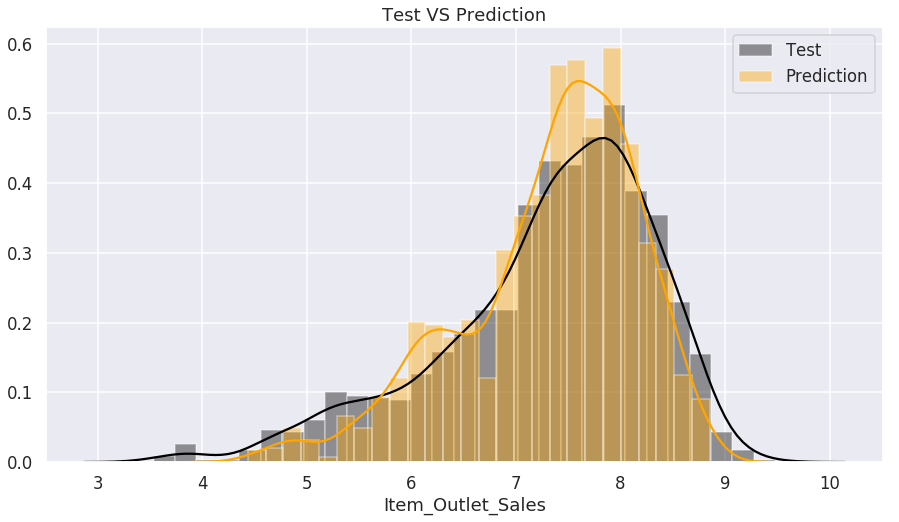

In [56]:
#Prediction vs reality

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=True, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=True, color="orange", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Vizualizations are always better way of representing the data.


- The above viz. shows us **how close our predicted sales are to actual sales.** 


- We can say that **Linear Regression** is acceptable model.


- We can further build a XGB Regressor to figure out its performance as well.

### XGB (Xtreme Gradient Boosting)

In [69]:
#XGB Implementation

from xgboost import XGBRegressor

est_xgb = XGBRegressor(max_depth=3, learning_rate=0.06, n_estimators=91, importance_type='total_gain'
                        )
est_xgb.fit(x_train, y_train)

xgb_pred =  est_xgb.predict(x_test)
#print ('Prediction : ', pred, '\n')

print ('Training Score : ', est_xgb.score(x_train, y_train))
print ('Validation Score : ', est_xgb.score(x_test, y_test))
print ('Cross Validation Score : ', cross_val_score(est_xgb, x_train, y_train, cv=5).mean())
#print ("R2_Score : ", r2_score(xgb_pred, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(xgb_pred, y_test)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score :  0.7495468429852097
Validation Score :  0.7386838752024187
[12:03:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:03:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Score :  0.7355120416560318
RMSLE :  0.06675531165670526


- We can observe that XGB's **training, validation and Cross-Validation scores** between **0.73 to 0.75** which is acceptable. As 2% to 3% of difference between scores is said to be acceptable.



- The **RMSLE** which we got here is a bit less that Linear Regression's. But even slight difference can make model better. Let us evaluate both models to getter better idea.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'XGB - Test VS Prediction')

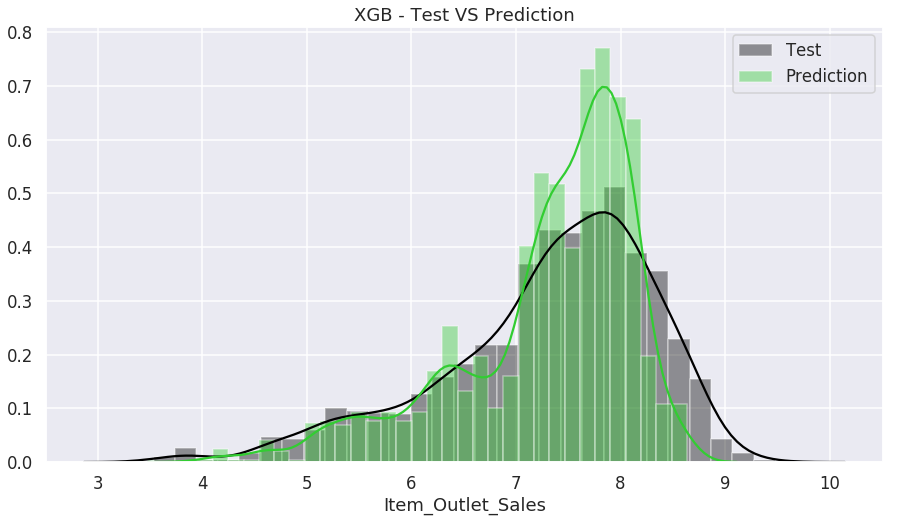

In [70]:
sns.set_context('talk')
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=True, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(xgb_pred, kde=True, color="limegreen", label="Prediction")
plt.legend()
plt.title("XGB - Test VS Prediction")

- Viz. above depicts XGB's sales prediction closeness to actual sales.

### Model Evaluation :


- In this phase of the project we're going to evaluate the models that we've built so far. We will compare the RMSLE obtained from different models.<br><br>

    - <b>RMSLE for ***Linear Regression*** - 0.0739
    - <b>RMSLE for ***XGB Regressor*** - 0.0667


- **XGB with max_depth=3, learning_rate=0.06, n_estimators=91 & importance_type='total_gain'** tends to perform better and we will use it to make predictions from the test data.

### Prediction on Test Set

- Further we'll make predictions on test data using **XGB**


- Since we had **Log. Transformed** our target while doing Pre-processing we will need to convert those values in **Exponential form.** For that we'll use **expm1** as we used **log1p for Log. Transformations.**


- And at last we'll read **Item_Itendifier** and create new dataframe and glue our **Predictions** to it and write it to **csv.**

In [0]:
test_id = pd.read_csv('Test_Retail.csv', header=0)['Item_Identifier']

final_pred = np.expm1(est_xgb.predict(test))
final_pred = pd.DataFrame({'Item_Identifier':test_id.values, 'Item_Outlet_Sales':final_pred})
final_pred.set_index('Item_Identifier', inplace=True)
final_sub = final_pred.to_csv('Final_Sub.csv')

- Below is the Viz. for **Distribution of Exp. Predictions**

Text(0.5, 1.0, 'Exp. Prediction')

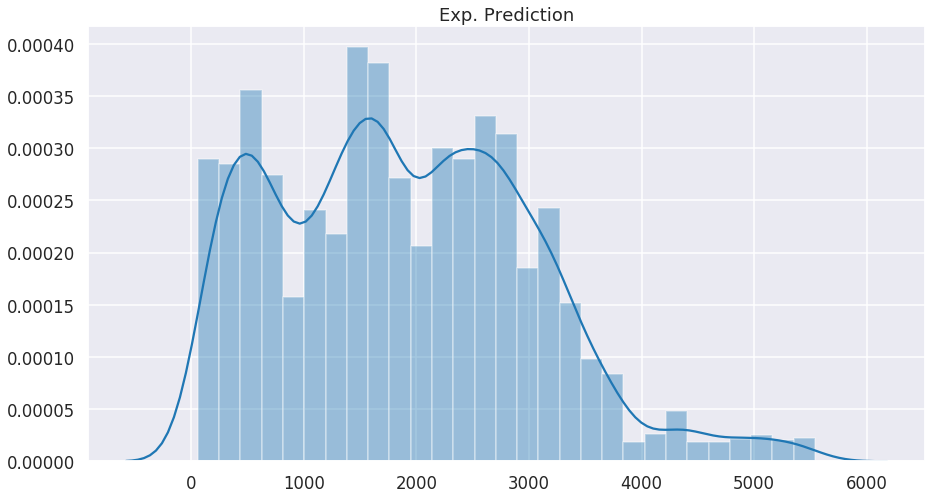

In [75]:
plt.figure(figsize=(15,8))
sns.distplot(np.expm1(est_xgb.predict(test)))
plt.title('Exp. Prediction')

### What's next ?

- We can improve further by doing **Hyper-Parameter** tuning using **GridSearchCV.**

- One can Try **Deep Neural Network** Implementation.

- One can also try **AutoML** approach.